In [45]:

import numpy as np 
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot


In [46]:
project = pd.read_csv("2018RegularSeasonDetailedStats_Cleaned (1).csv")


In [47]:
print(project.columns)
project.head()


Index(['Unnamed: 0', 'TeamID', 'OppID', 'W', 'TScore', 'OScore', 'TFGM',
       'TFGA', 'TFGM3', 'TFGA3', 'TFTM', 'TFTA', 'TOR', 'TDR', 'TAst', 'TTO',
       'TStl', 'TBlk', 'TPF', 'OFGM', 'OFGA', 'OFGM3', 'OFGA3', 'OFTM', 'OFTA',
       'OOR', 'ODR', 'OAst', 'OTO', 'OStl', 'OBlk', 'OPF'],
      dtype='object')


,Unnamed: 0,TeamID,OppID,W,TScore,OScore,TFGM,TFGA,TFGM3,TFGA3,...,OFGA3,OFTM,OFTA,OOR,ODR,OAst,OTO,OStl,OBlk,OPF
0,76636,1272,1104,0,70,82,23,60,2,17,...,27,19,28,13,27,16,16,8,7,30
1,76637,1233,1107,0,67,69,26,59,4,22,...,15,17,19,19,28,6,13,1,0,16
2,76638,1112,1319,1,101,67,34,57,5,13,...,13,17,30,12,11,11,13,3,1,24
3,76639,1226,1113,0,74,94,26,59,9,24,...,30,17,26,12,29,22,11,3,5,18
4,76640,1359,1116,0,56,95,20,61,8,29,...,22,14,22,7,28,28,11,7,6,18


In [48]:
X = project.iloc[:,6:] 
W = project.loc[:,'W']
X_opp = project.iloc[:,6:]
##W_opp = project.loc[:,'W']
W_opp = np.where(W_opp==1, 0, 1)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, W_train, W_test  = train_test_split(X, W, test_size=0.33, random_state=123)
X_train2, X_test2, W_train2, W_test2 = train_test_split(X_opp, W_opp, test_size=0.33, random_state=123)

In [50]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mlxtend.plotting import plot_decision_regions
Classifier = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=3)
clf = Classifier.fit(X_train,W_train)
clf
clf_opp = Classifier.fit(X_train2,W_train)
clf_opp

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [51]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
W_pred = Classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(W_test, W_pred))
print(confusion_matrix(W_test,W_pred))
print(classification_report(W_test,W_pred))
mse = mean_squared_error(W_pred,W_test)
rmse = np.sqrt(mse)
print(rmse)

##Please ignore following part so far, probably not useful
##W_pred_opp = Classifier.predict(X_test2)
##print("Accuracy:",metrics.accuracy_score(W_test2, W_pred_opp))
##print(confusion_matrix(W_test2,W_pred_opp))
##print(classification_report(W_test2,W_pred_opp))
#mse_opp = mean_squared_error(W_pred_opp,W_test2)
#rmse_opp = np.sqrt(mse_opp)
#print(rmse_opp)


Accuracy: 0.7303811659192825
[[616 284]
 [197 687]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       900
           1       0.71      0.78      0.74       884

    accuracy                           0.73      1784
   macro avg       0.73      0.73      0.73      1784
weighted avg       0.73      0.73      0.73      1784

0.5192483356552214


Text(0, 0.5, 'TFGA')

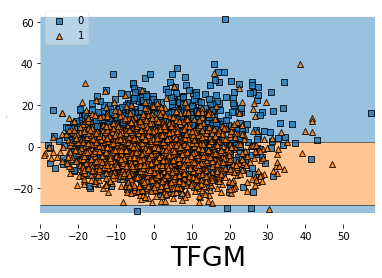

In [52]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions


X_train = np.array(X_train)
W_train = np.array(W_train)



pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
clf.fit(X_train, W_train)
plot_decision_regions(X_train, W_train, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=27)
plt.ylabel(X.columns[1], size=1)


In [53]:
# Calculating impurity from the example above
# Maximum state of impurity, 1.0
Max_impurity = -0.5*np.log2(0.5) + (-0.5*np.log2(0.5))
print(Max_impurity)
# Entropy of child 1 = 0
# Perfect split for this child

# Entropy of child 2 = 0.918
entropy_child2 = -(2/3)*np.log2(2/3) - (1/3)*np.log2(1/3)
print(entropy_child2)

# Weighted average of entropy(children)
avg_entropy = (3/4)*(0.9184) + (1/4)*0
print(avg_entropy)


# Entropy Gain
gain_entropy = 1 - (3/4)*(0.9184) + (1/4)*0
print(gain_entropy)

1.0
0.9182958340544896
0.6888
0.31120000000000003


In [54]:
df=pd.DataFrame({'Actual':W_test, 'Predicted':W_pred})
print(df)
df_opp=pd.DataFrame({'Actual':W_test2, 'Predicted':W_pred_opp})
print(df_opp)

      Actual  Predicted
5116       0          1
1569       1          1
3843       1          1
2754       0          0
3278       0          0
380        0          0
523        0          0
3094       0          0
220        1          1
3697       0          0
1838       1          0
4159       0          1
2488       0          0
2644       0          1
527        1          0
1355       0          0
4624       0          1
3588       1          0
2001       0          0
5352       1          0
4606       1          1
3811       1          0
5103       1          1
1308       0          0
3763       1          1
4558       1          1
2864       1          1
2070       0          0
299        0          0
3653       0          1
...      ...        ...
2763       1          0
846        0          1
2589       1          1
503        0          0
3045       0          0
3304       1          1
1549       1          1
958        1          1
2271       1          0
2484       1    

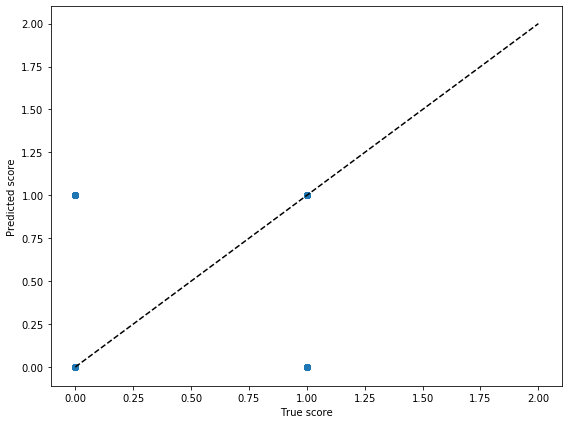

In [55]:
##Measuring decision tree performance
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(W_test, W_pred)
plt.plot([0, 2], [0, 2], '--k')
plt.axis('tight')
plt.xlabel('True score')
plt.ylabel('Predicted score')
plt.tight_layout()

In [56]:
%matplotlib inline

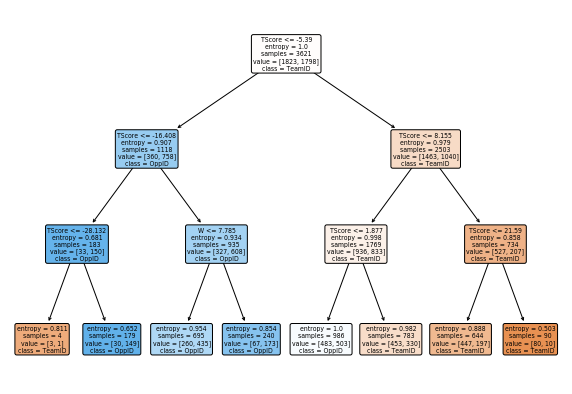

In [36]:
from sklearn.tree import plot_tree


plt.figure(figsize=(10, 7))

plot_tree(Classifier, 
          filled=True, 
          rounded=True,
          class_names=['TeamID', 
                       'OppID'],
          feature_names=['W', 
                         'TScore']) 

plt.show()